In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import warnings as wr
wr.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
df = pd.read_csv('Dhaka Rent.csv')

In [15]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [16]:
df.tail(3)

,area,rent
57,1800,25100
58,2200,31560
59,3100,51600


In [17]:
df.shape

(60, 2)

In [18]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


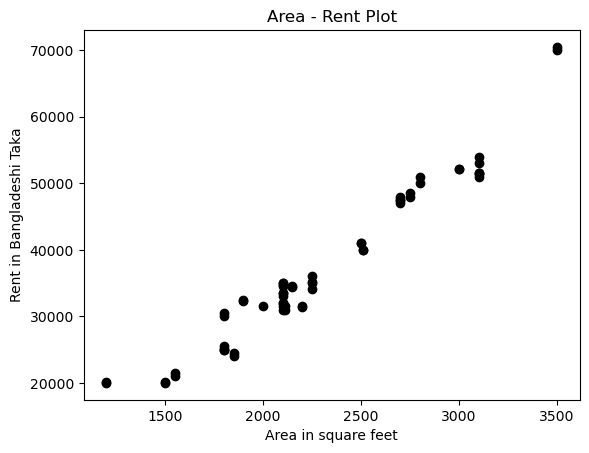

In [21]:
plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

In [22]:
df.area.mean()

2289.0

In [23]:
df.rent.mean()

37269.166666666664

In [27]:
x = df[['area']] # x = df.drop('rent', axis=1)

In [28]:
y = df.drop('area', axis=1)

In [29]:
y.head() #

,rent
0,31500
1,35000
2,41050
3,36100
4,52100


In [30]:
x.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [31]:
reg = LinearRegression() # creating object for linear regression 

In [32]:
reg.fit(x,y) # training the model

LinearRegression()

In [33]:
reg.coef_ 

array([[21.29266147]])

In [34]:
reg.intercept_ #c

array([-11469.73544643])

In [35]:
reg.predict([[3000]])

array([[52408.2489744]])

In [36]:
#y = m*x+c
result = ((reg.coef_) * 3000) + (reg.intercept_)
result

array([[52408.2489744]])

In [37]:
52408.2489744-52100

308.2489743999977

In [38]:
df['predicted_rent'] = reg.predict(x)

In [39]:
df.head()

,area,rent,predicted_rent
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [41]:
reg.predict([[3000]])

array([[52408.2489744]])

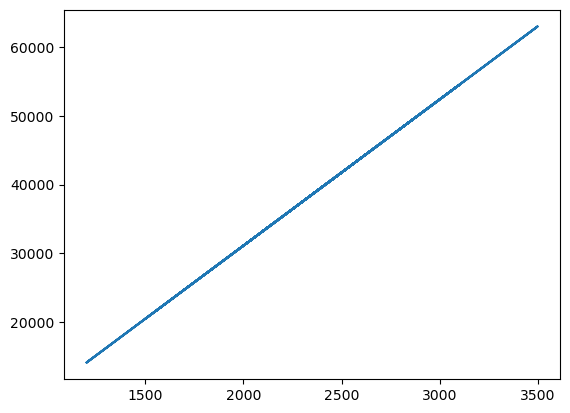

In [42]:
plt.plot(df.area, reg.predict(x))

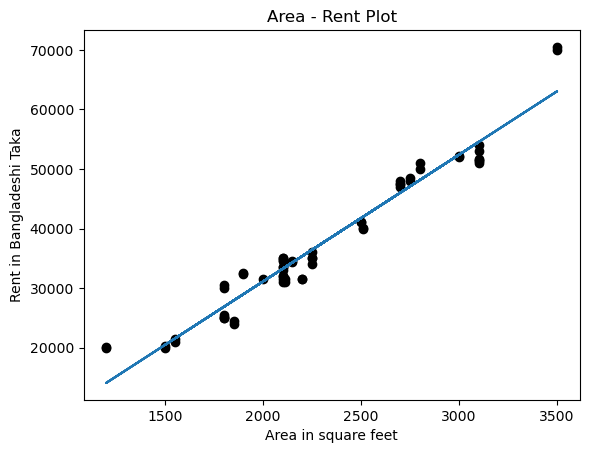

In [43]:
plt.plot(df.area, reg.predict(df[['area']]))
# x axis = area
# y axis = predicted rent

plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

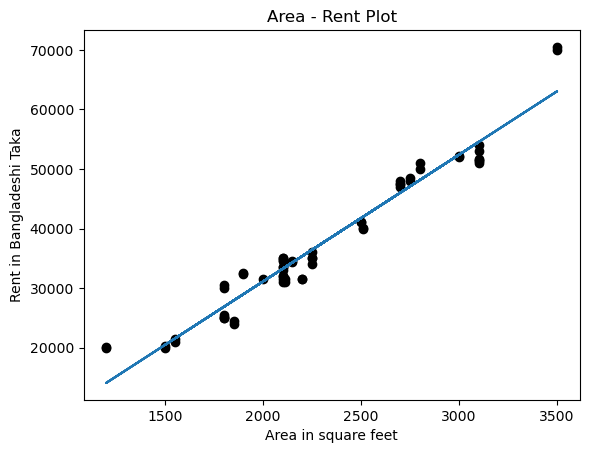

In [44]:
plt.plot(df.area.squeeze(), reg.predict(df[['area']]))
# x axis = area
# y axis = predicted rent

plt.scatter(df.area, df.rent, color='black')
plt.xlabel('Area in square feet')
plt.ylabel('Rent in Bangladeshi Taka')
plt.title('Area - Rent Plot')
plt.savefig('img1.png')

In [45]:
reg.score(x,y) # training sccuracy

0.950249380357677

In [46]:
# actual - predicted
mean_squared_error(df[['rent']], reg.predict(df[['area']]))

6778077.204095561

In [47]:
mean_absolute_error(y, df.predicted_rent)

2009.8695093576282